In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score



In [2]:


# Membaca dua dataset
df2 = pd.read_csv('HI-Large_Trans.csv', nrows=50000000)
df1 = pd.read_csv('LI-Large_Trans.csv', nrows=100000)

In [3]:
#df3 merupakan dataset yangs sama seperti df2 tetapi hanya berisi data yang 'Is Laundering' == 1 saja
df3 = df2[df2['Is Laundering'] == 1]

In [4]:
df3

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
27581,2022/08/01 00:19,70,100428660,8381,8035B3E00,27815.14,US Dollar,27815.14,US Dollar,Cheque,1
133037,2022/08/01 00:28,70,100428660,29630,814B11040,86532.59,US Dollar,86532.59,US Dollar,Cheque,1
141113,2022/08/01 00:06,215275,816439360,235985,816439870,4163.80,US Dollar,4163.80,US Dollar,ACH,1
154375,2022/08/01 00:05,70,100428660,220255,818305750,10111.03,US Dollar,10111.03,US Dollar,Cheque,1
161098,2022/08/01 00:16,70,100428660,1922,8192DF510,162.16,US Dollar,162.16,US Dollar,Cash,1
...,...,...,...,...,...,...,...,...,...,...,...
49995442,2022/08/27 07:19,70,1004289C0,182089,844A941C0,8830.49,Shekel,8830.49,Shekel,Cash,1
49995889,2022/08/27 07:18,70,1004289C0,1182567,849A81970,772.52,Shekel,772.52,Shekel,Cheque,1
49999427,2022/08/27 07:32,70,100428660,2102953,82621AFB0,206.57,US Dollar,206.57,US Dollar,Cheque,1
49999563,2022/08/27 07:42,14993,828972C00,194492,82897A990,16927.87,US Dollar,16927.87,US Dollar,Cheque,1


In [5]:
# kami membuat dataframe baru dengan nama 'df' untuk menggabungkan df1 dan df3 saja tanpa campuran dari df2
# df2 tidak terpakai karena sudah digantikan dengan isi dari df3

df = pd.concat([df1, df3], ignore_index=True)

In [6]:
# kami menggunakan function shuffle dari library sklearn.utils untuk mengacak row pada df sehingga baik data dari df1 ataupun data dari df3 bisa tercampur
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

## Check Overview Data
Pada bagian Check Overview Data, kami ingin melihat kondisi data kami secara keseluruhan. Pada bagian ini lah kami dapat mengetahui dan mengenal dataset yang akan kami olah selanjutnya. Bagi kami, melakukan Checking secara kasar diawal pemrosesan data sangatlah penting. Salah satu tujuan utama kami mengenal dataset kami diawal adalah agar kami dapat mengetahui langkah apa yang harus kami lakukan selanjutnya.

In [7]:
# Check jumlah data yang teridentifikasi sebagai money laundry dan yang tidak.
# terlihat bahwa data sudah cukup seimbang

df['Is Laundering'].value_counts()

Is Laundering
0    99997
1    57625
Name: count, dtype: int64

In [8]:
#check dimensi data
df.shape

(157622, 11)

In [9]:
#check variasi data dari tiap Feature
df.nunique()

Timestamp              38928
From Bank               9097
Account               109932
To Bank                 9829
Account.1             116236
Amount Received       123447
Receiving Currency        15
Amount Paid           123609
Payment Currency          15
Payment Format             7
Is Laundering              2
dtype: int64

## Check Missing Value
Langkah selanjutnya adalah pengecekan missing value dari masing-masing feature. Pada dataset yang kami dapat, data yang tidak ada missing valuenya sama sekali sehingga dapat memudahkan dalam pemrosesan data. Jika dataset memiliki beberapa missing value pada suatu featurenya, maka kami harus meng-impute data yang tidak ada tersebut berdasarkan nilai statistik deskriptif datanya dengan aturan dasar :

*) Jika data numerik kontinu : menggunakan mean

*) Jika data numerik diskrit : menggunakan median/modus

*) Jika data kategorik : menggunakan modus


NOTES : aturan-aturan tersebut dapat disesuaikan dengan kondisi dataset (tidak pasti)

In [10]:
# Check Missing Value pada masing-masing feature
df.isna().sum() 

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [11]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

## Feature Selection and Manipulation
Seperti yang sudah kita ketahui bersama, bahwa Machine Learning hanya dapat mengolah data yang bertipe numerik. Maka dari itu penting bagi kita untuk bijak memilih Feature-feature yang ada. Ketika ada feature yang tidak dapat diolah maka kita dapat memanipulasinya untuk dapat menghasilkan value yang berarti.

Berdasarkan informasi data diatas, ada beberapa kolom yang tidak bertipe data numerik yakni :

*) Timestamp

*) Account

*) Account.1

*) Receiving Currency

*) Payment Currency

*) Payment Format

In [12]:
# check data atribute
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

Kami memulai dengan memanipulasi kolom 'Timestamp'. kolom 'Timestamp' merupakan kolom bertipe object yang menyimpan data Tahun/Bulan/Hari/Jam/Menit dari suatu transaksi. Kami melakukan manipulasi pada kolom 'Timestamp' dengan hanya mengambil jam dan menitnya saja sebagai kolom baru bernama 'Hour' dan 'Minutes' bertipe integer.


Hal ini kami lakukan bukan tanpa alasan, melainkan karena kami memiliki kecurigaan bahwa ada kemungkinan para pelaku money laundry melakukan transaksi money laundry pada jam-jam tertentu. Maka dari itu kami berusaha untuk memanipulasi kolom 'Timestamp' yang awalnya bertipe objek, kami convert menjadi tipe timedate.


Setelah sistem sudah mengenal kolom 'Timestamp' sebagai kolom yang bertipe timedate, kami membuat kolom baru ('Hour' dan 'Minutes') untuk menyimpan jam dan menit dari kolom 'Timestamp'. Dengan demikian kolom 'Timestamp' menjadi kolom yang tidak relevan lagi maka kami memutuskan untuk drop kolom 'Timestamp'.

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [14]:
# Mengakses atribut jam dan menit menggunakan 'dt'
df['Hour'] = df['Timestamp'].dt.hour
df['Minutes'] = df['Timestamp'].dt.minute

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           157622 non-null  datetime64[ns]
 1   From Bank           157622 non-null  int64         
 2   Account             157622 non-null  object        
 3   To Bank             157622 non-null  int64         
 4   Account.1           157622 non-null  object        
 5   Amount Received     157622 non-null  float64       
 6   Receiving Currency  157622 non-null  object        
 7   Amount Paid         157622 non-null  float64       
 8   Payment Currency    157622 non-null  object        
 9   Payment Format      157622 non-null  object        
 10  Is Laundering       157622 non-null  int64         
 11  Hour                157622 non-null  int32         
 12  Minutes             157622 non-null  int32         
dtypes: datetime64[ns](1), float64

In [16]:
df = df.drop(columns=['Timestamp'])

Setelah memanupulasi kolom 'Timestamp', kami beralih ke feature selanjutnya yaitu 'Account' dan 'Account.1' dimana 'Account' merupakan Kode heksadesimal akun transaksi asal, dan 'Account.1' merupakan Kode heksadesimal akun transaksi tempat tujuan transaksi berakhir. Pada prosesnya, kami ingin mengetahui apakah ada pengaruh jika ada transaksi dari suatu rekening ke rekening yang sama terhadap identifikasi sebagai transaksi money laundry. 

Maka dari itu kami membuat kolom baru bernama 'Different Account' yang akan bernilai 0 jika transaksi dilakukan ke rekening yang sama dengan rekening pengirim, dan akan bernilai 1 jika transaksi dilakukan ke rekening yang berbeda dengan rekening pengirim. Setelah kolom 'Different Account' terbentuk, maka kolom 'Account' dan 'Account.1' tidak relevan lagi dan bisa di drop.

In [17]:
df['Different Account'] = np.where(df['Account'] == df['Account.1'], 0, 1)

In [18]:
#melihat jumlah data untuk pada kolom different account
df['Different Account'].value_counts()

Different Account
1    83658
0    73964
Name: count, dtype: int64

In [19]:
count_1_0 = df[(df['Different Account'] == 1) & (df['Is Laundering'] == 0)]['Is Laundering'].count()
count_0_1 = df[(df['Different Account'] == 0) & (df['Is Laundering'] == 1)]['Is Laundering'].count()
count_1_1 = df[(df['Different Account'] == 1) & (df['Is Laundering'] == 1)]['Is Laundering'].count()
count_0_0 = df[(df['Different Account'] == 0) & (df['Is Laundering'] == 0)]['Is Laundering'].count()

# Menampilkan hasil
print("Jumlah (Different Account=1, Is Laundering=0):", count_1_0)
print("Jumlah (Different Account=0, Is Laundering=1):", count_0_1)
print("Jumlah (Different Account=1, Is Laundering=1):", count_1_1)
print("Jumlah (Different Account=0, Is Laundering=0):", count_0_0)


Jumlah (Different Account=1, Is Laundering=0): 26155
Jumlah (Different Account=0, Is Laundering=1): 122
Jumlah (Different Account=1, Is Laundering=1): 57503
Jumlah (Different Account=0, Is Laundering=0): 73842


In [20]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(df['Is Laundering'], df['Different Account'])
conf_matrix

array([[73842, 26155],
       [  122, 57503]])

Pada awalnya, Kami berasumsi jika suatu transaksi terjadi dari suatu rekening ke rekening yang sama merupakan sebuah keanehan. Akan tetapi, setelah melakukan perhitungan ternyata pengaruh jika ada transaksi dari suatu rekening ke rekening yang sama terhadap identifikasi sebagai transaksi money laundry tidak cukup kuat. Hal ini didasari dari confusion matrix yang mengevaluasi pengaruh kolom 'Different Account' terhadap kolom 'Is Laundering' memiliki nilai yang cenderung rata. Adanya transaksi dari suatu rekening ke rekening yang sama DAN teridentifikasi sebagai money laundry hanya ada 122 data. Angka ini cenderung kecil jika dibandingkan dengan yang lainnya.

In [21]:
#Drop unrelatable columns
df = df.drop(columns=['Account','Account.1'])

In [22]:
df.head()

,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
0,14249,14249,8.01,US Dollar,8.01,US Dollar,Reinvestment,0,0,17,0
1,218456,237666,14377.48,Yuan,14377.48,Yuan,ACH,1,16,20,1
2,15133,111365,17474.34,US Dollar,17474.34,US Dollar,ACH,0,0,20,1
3,23527,23527,22.46,US Dollar,22.46,US Dollar,Reinvestment,0,0,15,0
4,117307,117307,21.50,US Dollar,21.50,US Dollar,Reinvestment,0,0,16,0


In [23]:
# Lihat kembali informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   From Bank           157622 non-null  int64  
 1   To Bank             157622 non-null  int64  
 2   Amount Received     157622 non-null  float64
 3   Receiving Currency  157622 non-null  object 
 4   Amount Paid         157622 non-null  float64
 5   Payment Currency    157622 non-null  object 
 6   Payment Format      157622 non-null  object 
 7   Is Laundering       157622 non-null  int64  
 8   Hour                157622 non-null  int32  
 9   Minutes             157622 non-null  int32  
 10  Different Account   157622 non-null  int64  
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 12.0+ MB


In [24]:
df.to_csv('money_laundry_dataset.csv')

## Advanced Exploratory Data Analysis (Visualization Data)

In [25]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

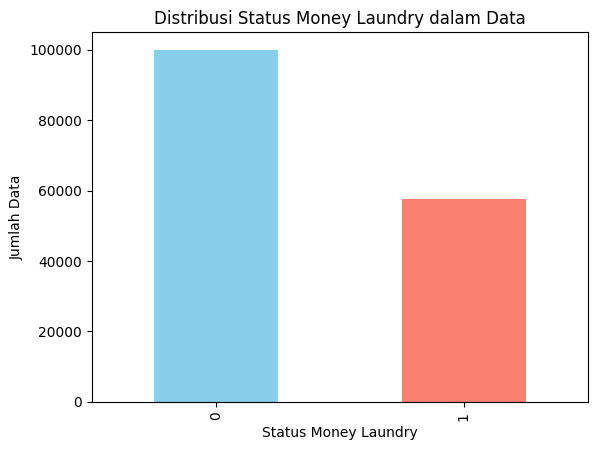

In [26]:
# Membuat barplot
df['Is Laundering'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Menambahkan label dan judul
plt.xlabel('Status Money Laundry')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Status Money Laundry dalam Data')

# Menampilkan barplot
plt.show()

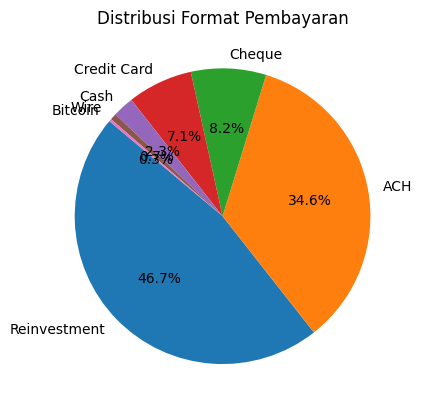

In [27]:
# Membuat pie chart dengan kolom 'Payment Format'
plt.pie(df['Payment Format'].value_counts(), labels=df['Payment Format'].value_counts().index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Distribusi Format Pembayaran')

# Menampilkan pie chart
plt.show()

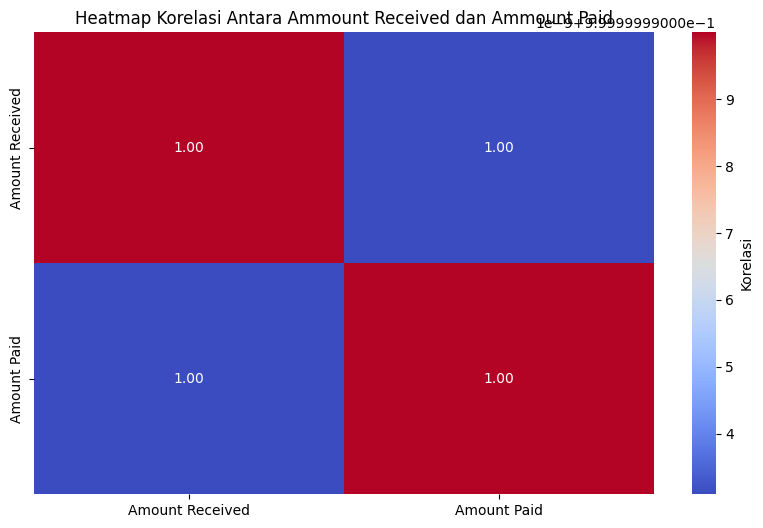

In [28]:
# Memilih kolom-kolom numerik untuk heatmap korelasi
numeric_columns = df[['Amount Received', 'Amount Paid']]

# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Korelasi'})

# Menambahkan judul
plt.title('Heatmap Korelasi Antara Ammount Received dan Ammount Paid')

# Menampilkan heatmap
plt.show()

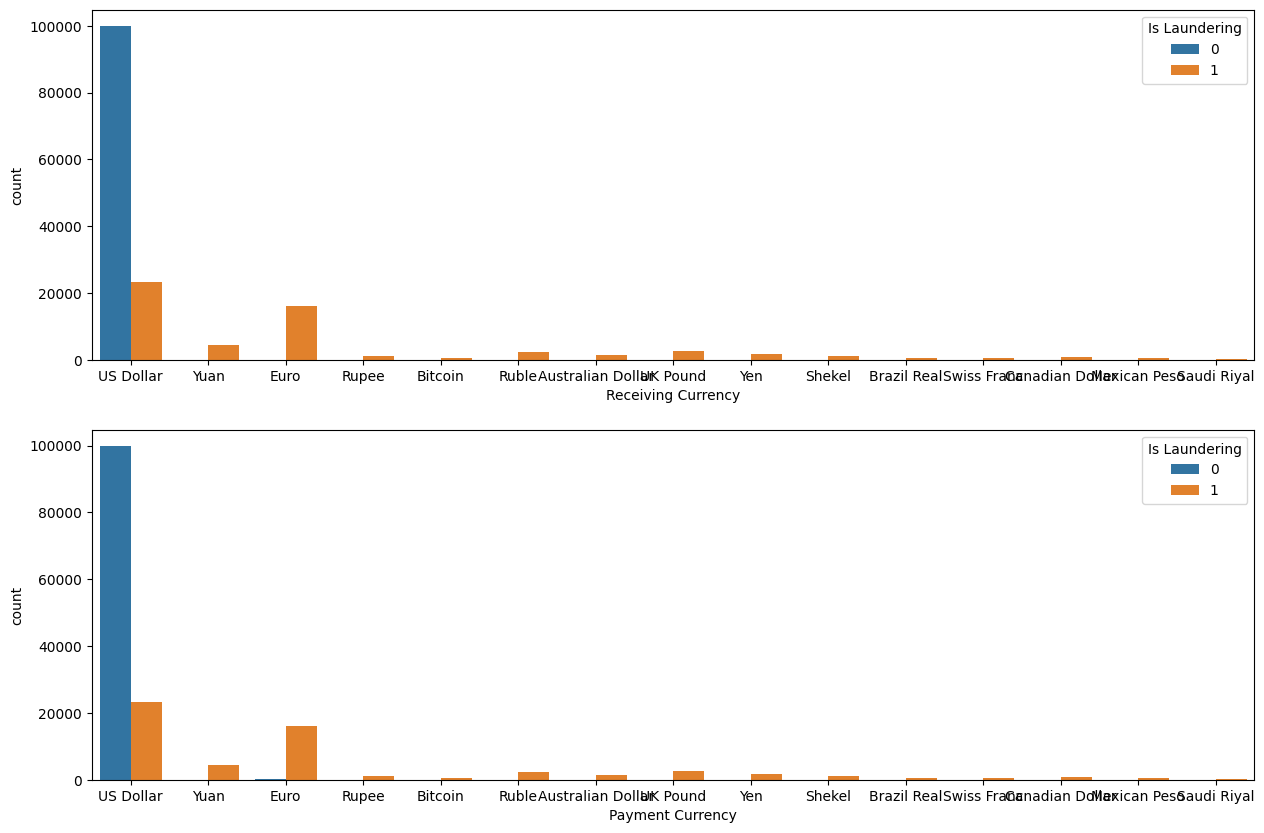

In [29]:
#Plot Categorical VS Target
cate = ["Receiving Currency","Payment Currency"]

fig, axes = plt.subplots(2,1,figsize=(15,10))
for cat, ax in zip(cate, axes.flatten()) :
  sns.countplot(x=cat,data=df,hue="Is Laundering",ax=ax)

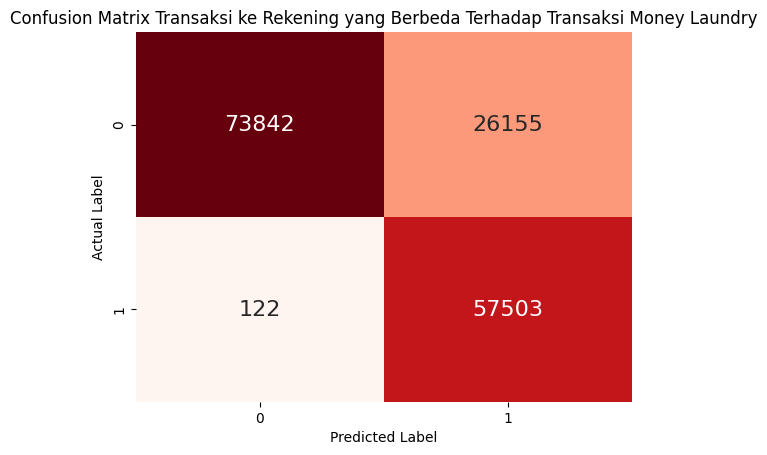

In [30]:
# Menghitung frekuensi kemunculan kombinasi kategori
cross_tab = pd.crosstab(df['Is Laundering'], df['Different Account'])

# Membuat heatmap dengan label
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 16}, cbar=False)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Transaksi ke Rekening yang Berbeda Terhadap Transaksi Money Laundry')

# Menampilkan plot
plt.show()

Insight : Visualisasi diatas adalah Confusion Matrix yang menunjukan jumlah True Positive, True Negative, False Positive, False Negative yang ada pada kolom 'Different Account' antara actual dan predicted valuenya. 

In [31]:
# # Filter DataFrame hanya untuk 'Is Laundering' yang memiliki nilai 1
# df_is_laundering_1 = df[df['Is Laundering'] == 1]

# # Pembuatan Histogra,
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df_is_laundering_1, x='Hour', bins=24, kde=True, color='skyblue')
# plt.title('Distribusi Kolom Hour untuk Is Laundering = 1')
# plt.xlabel('Jam')
# plt.ylabel('Frekuensi')
# plt.show()

## Check Data Variation
tahapan selanjut adalah kami melihat variasi data dari masing masing kolom yang bertipe kategorik

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   From Bank           157622 non-null  int64  
 1   To Bank             157622 non-null  int64  
 2   Amount Received     157622 non-null  float64
 3   Receiving Currency  157622 non-null  object 
 4   Amount Paid         157622 non-null  float64
 5   Payment Currency    157622 non-null  object 
 6   Payment Format      157622 non-null  object 
 7   Is Laundering       157622 non-null  int64  
 8   Hour                157622 non-null  int32  
 9   Minutes             157622 non-null  int32  
 10  Different Account   157622 non-null  int64  
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 12.0+ MB


In [33]:
#check data variation
df.nunique()

From Bank               9097
To Bank                 9829
Amount Received       123447
Receiving Currency        15
Amount Paid           123609
Payment Currency          15
Payment Format             7
Is Laundering              2
Hour                      24
Minutes                   60
Different Account          2
dtype: int64

In [34]:
# melihat variasi kolom Payment Currency
df['Payment Currency']

0         US Dollar
1              Yuan
2         US Dollar
3         US Dollar
4         US Dollar
            ...    
157617    US Dollar
157618    US Dollar
157619    US Dollar
157620    US Dollar
157621    US Dollar
Name: Payment Currency, Length: 157622, dtype: object

In [35]:
# melihat variasi kolom Receiving Currency
df['Receiving Currency'].unique()

array(['US Dollar', 'Yuan', 'Euro', 'Rupee', 'Bitcoin', 'Ruble',
       'Australian Dollar', 'UK Pound', 'Yen', 'Shekel', 'Brazil Real',
       'Swiss Franc', 'Canadian Dollar', 'Mexican Peso', 'Saudi Riyal'],
      dtype=object)

In [36]:
# melihat variasi kolom Payment Format
df['Payment Format'].unique()

array(['Reinvestment', 'ACH', 'Wire', 'Cheque', 'Bitcoin', 'Credit Card',
       'Cash'], dtype=object)

## Feature Engineering
Tujuan kami melihat variasi data kategorik diatas adalah untuk menentukan feature Engineering yang tepat untuk masing-masing kolom kategorik.

*) Binary Encoding (untuk mengubah data kategorik yang hanya memiliki 2 unique value)

*) One Hot Encoding (untuk mengubah data kategorik yang memiliki lebih dari 2 unique value)

*) Label Encoding (untuk mengubah data kategorik menjadi label yang kita tentukan sendiri)

*) Frequency Encoding (untuk mengubah data kategorik menjadi numerik berdasarkan frekuensi munculnya masing-masing value)

*) mean Encoding (untuk mengubah data kategorik menjadi numerik berdasarkan mean)

In [37]:
#Before Feature Engineering
df.head()

,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
0,14249,14249,8.01,US Dollar,8.01,US Dollar,Reinvestment,0,0,17,0
1,218456,237666,14377.48,Yuan,14377.48,Yuan,ACH,1,16,20,1
2,15133,111365,17474.34,US Dollar,17474.34,US Dollar,ACH,0,0,20,1
3,23527,23527,22.46,US Dollar,22.46,US Dollar,Reinvestment,0,0,15,0
4,117307,117307,21.50,US Dollar,21.50,US Dollar,Reinvestment,0,0,16,0


Untuk kolom 'Payment Currency' dan 'Receiving Currency' kami sepakat untuk menggunakan frekuensi encoding. Alasannya karena variasi data nya cukup banyak (terdapat 15 unique value) sehingga tidak bisa menggunakan binary encoding dan juga akan sangat memberatkan jika menggunakan one hot ecoding.

In [38]:
#Create a Frequency Encoding Function
def frequency_encoding(data,features) :
    freq_encoding=data.groupby(features).size()/len(data)
    return freq_encoding

In [39]:
tes_dict = []
for index, data in df.iterrows():
    if data['Payment Currency'] not in tes_dict:
        tes_dict.append(data['Payment Currency'])

print(tes_dict)

['US Dollar', 'Yuan', 'Euro', 'Rupee', 'Bitcoin', 'Ruble', 'Australian Dollar', 'UK Pound', 'Yen', 'Shekel', 'Brazil Real', 'Swiss Franc', 'Canadian Dollar', 'Mexican Peso', 'Saudi Riyal']


In [40]:
df['Payment Currency'] = df['Payment Currency'].map(frequency_encoding(df,df['Payment Currency']))

In [41]:
df['Receiving Currency'] = df['Receiving Currency'].map(frequency_encoding(df,df['Receiving Currency']))

Pada kolom 'Payment Format' kami sepakat untuk menggunakan one hot encoding sebagai feature engineering karena jumlah unique value dari kolom 'Payment Format' hanya ada 7 sehingga tidak terlalu memberatkan saat pembangunan model Machine Learning.

In [42]:
#One hot encoding For Payment Format
df = pd.get_dummies(df,columns=['Payment Format'])

In [43]:
df.head()

,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Is Laundering,Hour,Minutes,Different Account,Payment Format_ACH,Payment Format_Bitcoin,Payment Format_Cash,Payment Format_Cheque,Payment Format_Credit Card,Payment Format_Reinvestment,Payment Format_Wire
0,14249,14249,8.01,0.781078,8.01,0.780342,0,0,17,0,False,False,False,False,False,True,False
1,218456,237666,14377.48,0.028765,14377.48,0.028873,1,16,20,1,True,False,False,False,False,False,False
2,15133,111365,17474.34,0.781078,17474.34,0.780342,0,0,20,1,True,False,False,False,False,False,False
3,23527,23527,22.46,0.781078,22.46,0.780342,0,0,15,0,False,False,False,False,False,True,False
4,117307,117307,21.50,0.781078,21.50,0.780342,0,0,16,0,False,False,False,False,False,True,False


In [44]:
tes_dict = []
for index, data in df.iterrows():
    if data['Payment Currency'] not in tes_dict:
        tes_dict.append(data['Payment Currency'])

print(tes_dict)

[0.7803415766834579, 0.028872873076093437, 0.10290441689611857, 0.007860577838119043, 0.002835898542081689, 0.015080382180152516, 0.009351486467625078, 0.016406339216606818, 0.011527578637499841, 0.0070611970410221925, 0.0029754729669716155, 0.003705066551623504, 0.005379959650302623, 0.003438606285924554, 0.002258567966400629]


In [45]:
df['Payment Currency'].nunique()

15

In [46]:
df.shape

(157622, 17)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   From Bank                    157622 non-null  int64  
 1   To Bank                      157622 non-null  int64  
 2   Amount Received              157622 non-null  float64
 3   Receiving Currency           157622 non-null  float64
 4   Amount Paid                  157622 non-null  float64
 5   Payment Currency             157622 non-null  float64
 6   Is Laundering                157622 non-null  int64  
 7   Hour                         157622 non-null  int32  
 8   Minutes                      157622 non-null  int32  
 9   Different Account            157622 non-null  int64  
 10  Payment Format_ACH           157622 non-null  bool   
 11  Payment Format_Bitcoin       157622 non-null  bool   
 12  Payment Format_Cash          157622 non-null  bool   
 13 

## Splitting Dataset
Selanjutnya kami memulai pembangunan model machine learning ini dengan melakukan splitting dataset. Splitting ini bertujuan agar ada sebagian data yang menjadi bahan untuk pelatihan model Machine Learning kami (training model), dan sebagian lagi untuk mengetes model kami untuk melihat ke-akuratan model yang dibangun (testing model). Pada kasus ini, kami membagi data menjadi 80% untuk training dan 20% untuk testing.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split# from sklearn.linear_model import LogisticRegression

#spliting dataset
X = df.drop(columns="Is Laundering")
y = df['Is Laundering']
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((126097, 16), (31525, 16), (126097,), (31525,))

## Logistic Regression Model : Default

In [49]:
# Import library
from sklearn.linear_model import LogisticRegression

# Train data dengan data training
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# melihat keakuratan model
model_log.score(X_test,y_test)

0.604314036478985

In [51]:
y_predict_log=model_log.predict(X_test)

In [52]:
# Menampilkan report untuk melihat performa model

from sklearn.metrics import classification_report
print('\nLogistic Regression Classification Report (Default)\n')
print(classification_report(y_test, y_predict_log))


Logistic Regression Classification Report (Default)

              precision    recall  f1-score   support

           0       0.97      0.39      0.55     20000
           1       0.48      0.98      0.64     11525

    accuracy                           0.60     31525
   macro avg       0.72      0.68      0.60     31525
weighted avg       0.79      0.60      0.59     31525



# LR Model Improvement : Parameter Tuning


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Tentukan parameter apa saja yang akan dituning
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Inisialisasi model Logistic Regression
modelLogReg = LogisticRegression()

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search_logreg = GridSearchCV(modelLogReg, param_grid=parameters, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [54]:
# Menampilkan parameter terbaik yang dapat menghasilkan akurasi maksimal yang dapat dibuat oleh Model Logistic Regression
print("Tuned Hyperparameters :", grid_search_logreg.best_params_)
print("Accuracy :",grid_search_logreg.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Accuracy : 0.5601255586313694


In [55]:
#Train data dengan parameter terbaik
modellog_best = LogisticRegression(C = 0.001, penalty = 'l2')
modellog_best.fit(X_train,y_train)

LogisticRegression(C=0.001)

# Logistic Regression Evaluation Matrix (Best)

In [56]:
y_predict_bestlog = modellog_best.predict(X_test)

In [57]:
print('\nLogistic Regression Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestlog))


Logistic Regression Classification Report (Tuned)

              precision    recall  f1-score   support

           0       0.96      0.42      0.58     20000
           1       0.49      0.97      0.65     11525

    accuracy                           0.62     31525
   macro avg       0.73      0.69      0.62     31525
weighted avg       0.79      0.62      0.61     31525



# Naive Bayes Model : Default


In [58]:
from sklearn.naive_bayes import MultinomialNB

# Training Model
model_nb =MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB()

In [59]:
# Melihat akurasi model
model_nb.score(X_test,y_test)

0.5988897700237906

In [60]:
# Testing
y_predict_nb=model_nb.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print('\nNaive Bayes Classification Report (Default)\n')
print(classification_report(y_test, y_predict_nb))


Naive Bayes Classification Report (Default)

              precision    recall  f1-score   support

           0       0.63      0.92      0.74     20000
           1       0.25      0.05      0.08     11525

    accuracy                           0.60     31525
   macro avg       0.44      0.48      0.41     31525
weighted avg       0.49      0.60      0.50     31525



# NB Model Improvement : Parameter Tuning
model tersebut hanya memberikan akurasi sebesar 60% dalam memprediksi apakah sebuah transaksi masuk ke kategori money laundry atau tidak. Kami masih ingin mencoba memaksimalkan model naive bayes kami dengan parameter tuning menggunakan gridSearchCV. kami melakukan tuning dengan parameter alpha pada model Naive Bayes.

In [62]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Tentukan parameter grid untuk Multinomial Naive Bayes
parameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Inisialisasi model Multinomial Naive Bayes
modelNB = MultinomialNB()

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search_nb = GridSearchCV(modelNB, param_grid=parameters, scoring='accuracy', cv=5)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [63]:
# Menampilkan parameter terbaik dan akurasi maksimalnya

print("Tuned Hyperparameters :", grid_search_nb.best_params_)
print("Accuracy :",grid_search_nb.best_score_)

Tuned Hyperparameters : {'alpha': 0.001}
Accuracy : 0.5984044090971653


In [64]:
#Train data dengan parameter terbaik
modelnb_best = MultinomialNB(alpha = 0.001)
modelnb_best.fit(X_train,y_train)

MultinomialNB(alpha=0.001)

# Naive Bayes Evaluation Matrix (Best)

In [65]:
y_predict_bestnb = modelnb_best.predict(X_test)

In [66]:
print('\nNaive Bayes Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestnb))
Accuracy_NB = accuracy_score(y_test, y_predict_bestnb)



Naive Bayes Classification Report (Tuned)

              precision    recall  f1-score   support

           0       0.63      0.92      0.74     20000
           1       0.25      0.05      0.08     11525

    accuracy                           0.60     31525
   macro avg       0.44      0.48      0.41     31525
weighted avg       0.49      0.60      0.50     31525



## K-Nearest Neighbor Model : Default
Setelah mengoptimalkan model Naive Bayes kami masih belum menemukan model yang terbaik dengan akurasi yang cukup tinggi untuk memprediksi label 'Is Laundering'. Maka dari itu, kami mencoba menggunakan model KNN.

In [67]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

#train data dengan training data
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
# melihat akurasi KNN dengan data testing
print('KNN Default Accuracy :')
knn.score(X_test,y_test)

KNN Default Accuracy :


0.8789532117367169

In [69]:
# testing
y_predict_knndefault=knn.predict(X_test)

In [70]:
# menampilkan report klasifikasi untuk knn
from sklearn.metrics import classification_report
print('\nK-Nearest neighbor Classification Report (Default)\n')
print(classification_report(y_test, y_predict_knndefault))



K-Nearest neighbor Classification Report (Default)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     20000
           1       0.84      0.82      0.83     11525

    accuracy                           0.88     31525
   macro avg       0.87      0.87      0.87     31525
weighted avg       0.88      0.88      0.88     31525



# K-Nearest Neighbor : K-Fold 

In [71]:
#import libraries
from sklearn.model_selection import cross_val_score

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_knn = cross_val_score(knn,X,y,cv=5)

In [73]:
print('KNN K Fold Accuracy :')
cross_knn.mean()

KNN K Fold Accuracy :


0.8789065107148453

# KNN Model Improvement : Parameter Tuning

In [74]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Tentukan parameter untuk KNN
parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Inisialisasi model KNN
knn_tuned = KNeighborsClassifier()

# Pencarian parameter terbaik
knn_tuned = GridSearchCV(knn_tuned, param_grid=parameters, scoring='accuracy', cv=5)
knn_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [76]:
# menampilkan parameter terbaik dan akurasinya
print("Tuned Hyperparameters :", knn_tuned.best_params_)
print("Accuracy :",knn_tuned.best_score_)

Tuned Hyperparameters : {'n_neighbors': 7, 'weights': 'distance'}
Accuracy : 0.8840654254142122


In [77]:
# Train data dengan menggunakan parameter terbaik
modelknn_best = KNeighborsClassifier(n_neighbors = 7, weights= 'distance')
modelknn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [78]:
# akurasi dengan parameter terbaik
modelknn_best.score(X_test,y_test)

0.8882474226804123

# K-Nearest Neighbor Evaluation Matrix (Best)
Setelah di tuning dengan n_neighbors = 7, weights= 'distance', kami mendapatkan model yang akurasinya lebih baik yakni mencapai 88.94%.

In [79]:
#testing
y_predict_knntuned=modelknn_best.predict(X_test)

In [80]:
# Menampilkan report klasidifikasi untuk knn setelah dituning
from sklearn.metrics import classification_report
print('\nK-Nearest neighbor Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_knntuned))


K-Nearest neighbor Classification Report (Tuned)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     20000
           1       0.86      0.83      0.84     11525

    accuracy                           0.89     31525
   macro avg       0.88      0.88      0.88     31525
weighted avg       0.89      0.89      0.89     31525



In [81]:
Accuracy_KNN = accuracy_score(y_test, y_predict_knntuned)



# Decision Tree Model : Default

In [82]:
# Import Library
from sklearn.tree import DecisionTreeClassifier

# Melakukan train dengan training data
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
# Menampilkan akurasi model Decision Tree
modelDT.score(X_test,y_test)

0.9975574940523394

In [84]:
# testing
y_predict_dtdefault=modelDT.predict(X_test)

In [85]:
# Menampilkan Classification Report untuk Decision Tree Default
from sklearn.metrics import classification_report
print('\nDecision Tree Classification Report (Default)\n')
print(classification_report(y_test, y_predict_dtdefault))


Decision Tree Classification Report (Default)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     11525

    accuracy                           1.00     31525
   macro avg       1.00      1.00      1.00     31525
weighted avg       1.00      1.00      1.00     31525



# DT Model Improvement : Parameter Tuning
Ternyata kami menemukan bahwa Model dengan Decision Tree menghasilkan akurasi yang sangat baik dan mencapai 99.76%. Padahal model ini masih belum kami maksimalkan dengan parameter tuning. Maka sekarang kami akan melakukan parameter Tuning dengan GridSearchCV dengan mencari parameter criterion dan max_depth yang menghasilkan akurasi maksimal.

In [86]:
# Import Library
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

modelDT = DecisionTreeClassifier()
modelDT = GridSearchCV(modelDT, param_grid = parameters, scoring='accuracy', cv=5)
modelDT.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy')

In [87]:
# Menampilkan parameter terbaik dan akurasinya
print("Tuned Hyperparameters :", modelDT.best_params_)
print("Accuracy :",modelDT.best_score_)

Tuned Hyperparameters : {'criterion': 'log_loss', 'max_depth': 8}
Accuracy : 0.9980094672021231


In [88]:
#Train data dengan data training
modeldt_best = DecisionTreeClassifier(criterion= 'gini',max_depth=8)
modeldt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [89]:
modeldt_best.score(X_test,y_test)

0.9983505154639175

# Decision Tree Evaluation Matrix (Best)
Setelah di testing, model maksimal yang dapat dibuat oleh Decision Tree adalah 99.84% (sedikit lebih baik daripada sebelum di tuning).

In [90]:
# testing
y_predict_bestdt = modeldt_best.predict(X_test)

In [91]:
# menampilkan clasification report
print('\nDecision Tree Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestdt))


Decision Tree Classification Report (Tuned)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     11525

    accuracy                           1.00     31525
   macro avg       1.00      1.00      1.00     31525
weighted avg       1.00      1.00      1.00     31525



In [92]:
Accuracy_DT = accuracy_score(y_test, y_predict_bestdt)


In [93]:
# Confusion Matrix Untuk Matrix Evaluation Lanjutan

# Import Library
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix_bestdt = confusion_matrix(y_test, y_predict_bestdt)
conf_matrix_bestdt

array([[19994,     6],
       [   46, 11479]])

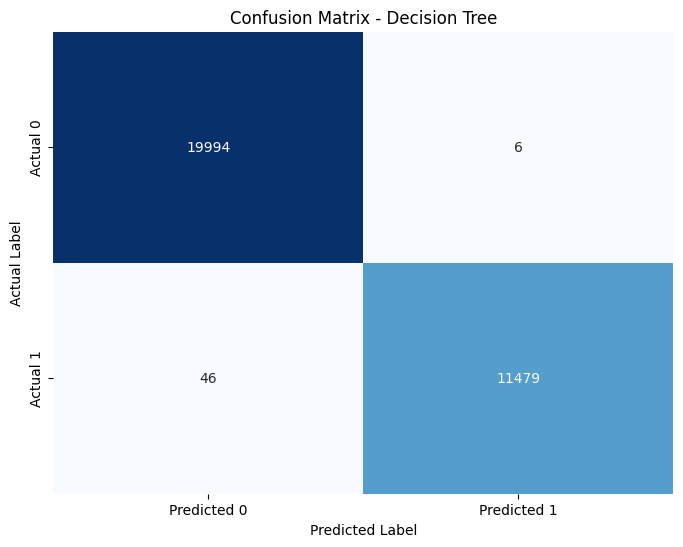

In [94]:
# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bestdt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [95]:
evaluation = pd.DataFrame({'Model': ['Naive Bayes','KNN', 'Decision Tree'],
                           'Accuracy': [(Accuracy_NB*100), (Accuracy_KNN*100), (Accuracy_DT*100)]})

evaluation

,Model,Accuracy
0,Naive Bayes,59.936558
1,KNN,88.824742
2,Decision Tree,99.835052


In [96]:
import joblib

# Simpan model Dt
joblib.dump(modeldt_best, 'dt_model.joblib')

# Simpan model Naive Bayes
joblib.dump(modelnb_best, 'nb_model.joblib')

# Simpan model K-Nearest Neighbors
joblib.dump(modelknn_best, 'knn_model.joblib')

# Simpan model Logistic regression
joblib.dump(modellog_best, 'log_model.joblib')

['log_model.joblib']

In [97]:
import joblib

# Muat model Dt
dt_model = joblib.load('dt_model.joblib')

# Muat model Naive Bayes
nb_model = joblib.load('nb_model.joblib')

# Muat model K-Nearest Neighbors
knn_model = joblib.load('knn_model.joblib')

# Muat model Logistic Regression
lg_model = joblib.load('log_model.joblib')

In [98]:
! pip install streamlit -q


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [99]:
%%writefile app.py

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [100]:
!wget -q -O - ipv4.icanhazip.com

zsh:1: command not found: wget


In [101]:
! streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) npm ERR! canceled

npm ERR! A complete log of this run can be found in: /Users/user/.npm/_logs/2024-06-29T05_49_42_249Z-debug-0.log
